Acceptance rate: 0.76


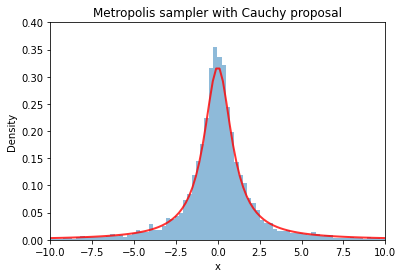

In [12]:
import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt

def cauchy_metropolis_normal(x0, n_samples, sigma_prop):
    # Define target distribution
    def target_dist(x):
        return cauchy.pdf(x)
    
    # Initialize sampler
    samples = np.zeros(n_samples)
    samples[0] = x0
    accepted = 0
    
    # Run sampler
    for i in range(1, n_samples):
        # Propose new sample from normal distribution
        x_proposed = np.random.normal(samples[i-1], sigma_prop)
        
        # Compute acceptance ratio
        acceptance_ratio = min(1, target_dist(x_proposed) / target_dist(samples[i-1]))
        
        # Accept or reject proposed sample
        if np.random.uniform() < acceptance_ratio:
            samples[i] = x_proposed
            accepted += 1
        else:
            samples[i] = samples[i-1]
    
    print(f"Acceptance rate: {accepted/n_samples:.2f}")
    return samples
x0 = 0
n_samples = 10000
sigma_prop = 1

samples = cauchy_metropolis_normal(x0, n_samples, sigma_prop)

plt.hist(samples, bins=100, density=True, alpha=0.5)
plt.xlim([-10, 10])
plt.ylim([0, 0.4])

# Plot true density function of Cauchy distribution
x = np.linspace(-10, 10, 100)
plt.plot(x, cauchy.pdf(x), 'r-', lw=2, alpha=0.8)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis sampler with Cauchy proposal')
plt.show()


Acceptance rate: 0.60


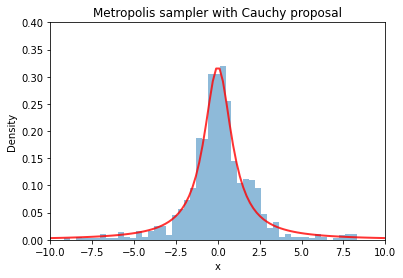

In [9]:
import numpy as np
from scipy.stats import cauchy

def cauchy_metropolis_cauchy(x0, n_samples, gamma_prop):
    # Define target distribution
    def target_dist(x):
        return cauchy.pdf(x)
    
    # Initialize sampler
    samples = np.zeros(n_samples)
    samples[0] = x0
    accepted = 0
    
    # Run sampler
    for i in range(1, n_samples):
        # Propose new sample from Cauchy distribution
        x_proposed = np.random.standard_cauchy() * gamma_prop + samples[i-1]
        
        # Compute acceptance ratio
        acceptance_ratio = min(1, target_dist(x_proposed) / target_dist(samples[i-1]))
        
        # Accept or reject proposed sample
        if np.random.uniform() < acceptance_ratio:
            samples[i] = x_proposed
            accepted += 1
        else:
            samples[i] = samples[i-1]
    
    print(f"Acceptance rate: {accepted/n_samples:.2f}")
    return samples
import matplotlib.pyplot as plt

# Generate samples using Metropolis sampler with Cauchy proposal
x0 = 0
n_samples = 1000
gamma_prop = 1
samples = cauchy_metropolis_cauchy(x0, n_samples, gamma_prop)

# Plot histogram of samples
plt.hist(samples, bins=100, density=True, alpha=0.5)
plt.xlim([-10, 10])
plt.ylim([0, 0.4])

# Plot true density function of Cauchy distribution
x = np.linspace(-10, 10, 100)
plt.plot(x, cauchy.pdf(x), 'r-', lw=2, alpha=0.8)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis sampler with Cauchy proposal')
plt.show()

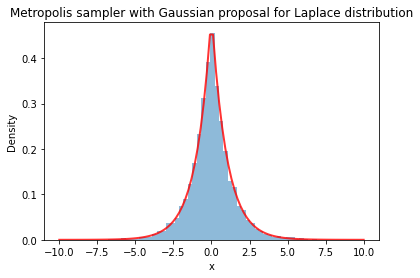

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def laplace_pdf(x, mu, b):
    """Laplace (double exponential) PDF"""
    return (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b)

def metropolis_laplace_gaussian(x0, n_samples, sigma_prop, mu_lap, b_lap):
    """Metropolis algorithm with Gaussian proposal for Laplace distribution"""
    samples = [x0]
    x_prev = x0
    for i in range(n_samples):
        x_star = np.random.normal(loc=x_prev, scale=sigma_prop)
        alpha = min(1, laplace_pdf(x_star, mu_lap, b_lap) / laplace_pdf(x_prev, mu_lap, b_lap))
        u = np.random.uniform()
        if u <= alpha:
            samples.append(x_star)
            x_prev = x_star
        else:
            samples.append(x_prev)
    return np.array(samples)

# Set parameters
x0 = 0  # initial value
n_samples = 10000  # number of samples to generate
sigma_prop = 1  # standard deviation of Gaussian proposal distribution
mu_lap = 0  # mean of Laplace distribution
b_lap = 1  # scale parameter of Laplace distribution

# Generate samples using Metropolis sampler with Gaussian proposal
samples = metropolis_laplace_gaussian(x0, n_samples, sigma_prop, mu_lap, b_lap)

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.5)

# Plot true density function of Laplace distribution
x = np.linspace(-10, 10, 100)
plt.plot(x, laplace_pdf(x, mu_lap, b_lap), 'r-', lw=2, alpha=0.8)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis sampler with Gaussian proposal for Laplace distribution')
plt.show()